# <p style="background-color:#3E362E; font-family:calibri; color:white; padding-top: 30px; padding-bottom: 30px;font-size:100%; text-align:center; border-radius:15px 50px;"> Customer_Feedback_Analysis</p>

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:WHITE; font-size:70%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, precision_score, classification_report, mean_absolute_error, mean_squared_error, r2_score


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [54]:
df = pd.read_csv(r"F:\Projects\Customer_Feedback\customer_feedback_satisfaction.csv")

In [55]:
df.head(5)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 3 | Data Overview</p>

In [56]:
df.shape

(38444, 11)

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,38444.0,19222.500000,11097.971211,1.00,9611.75,19222.50,28833.25,38444.0
Age,38444.0,43.496853,14.972748,18.00,31.00,43.00,56.00,69.0
Income,38444.0,75076.619238,25975.752966,30001.00,52624.50,75236.00,97606.75,119999.0
ProductQuality,38444.0,5.494746,2.873192,1.00,3.00,5.00,8.00,10.0
ServiceQuality,38444.0,5.492769,2.875812,1.00,3.00,5.00,8.00,10.0
PurchaseFrequency,38444.0,10.453881,5.765621,1.00,5.00,10.00,15.00,20.0
SatisfactionScore,38444.0,85.276409,16.898577,4.28,74.47,91.27,100.00,100.0


In [58]:
df.describe(include='object')

,Gender,Country,FeedbackScore,LoyaltyLevel
count,38444,38444,38444,38444
unique,2,5,3,3
top,Female,USA,High,Gold
freq,19294,7762,12918,12912


# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 4 | EDA - Exploratory Data Analysis</p>

<h3 style="color:#AC8968;">Step 4-1: Check Gender in percentage</h3>

In [59]:
df['Gender'].value_counts()

Gender
Female    19294
Male      19150
Name: count, dtype: int64

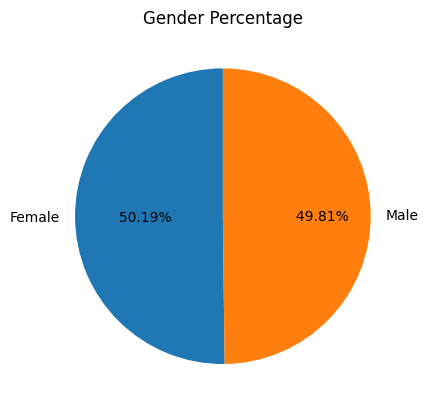

In [60]:
gender_counts = df['Gender'].value_counts()
gender_percentage = gender_counts / gender_counts.sum() * 100

plt.pie(gender_percentage, labels=gender_percentage.index, autopct='%10.2f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()

<h3 style="color:#AC8968;">Step 4-2: Gender VS Session_Duration </h3>

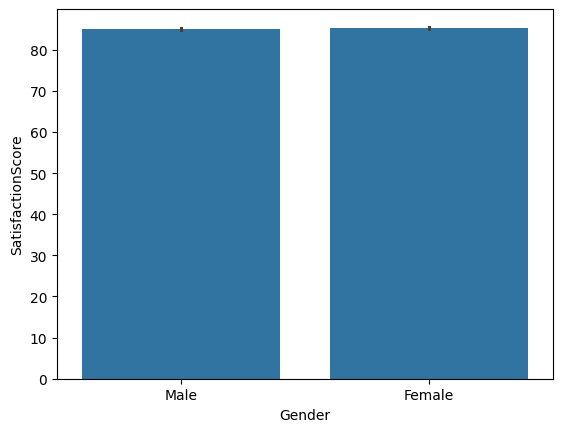

In [61]:
sns.barplot(x=df['Gender'],y=df['SatisfactionScore'])
plt.show()

<h3 style="color:#AC8968;">Step 4-3: Check Country in Percantage </h3>

In [62]:
df['Country'].unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

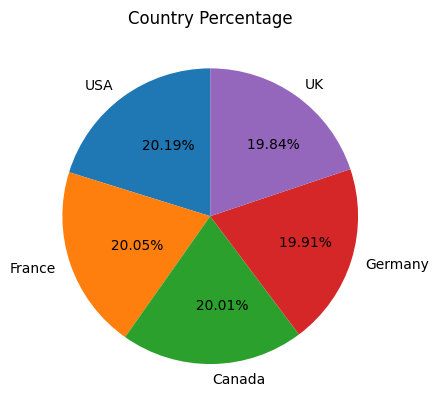

In [63]:
Country_counts = df['Country'].value_counts()
Country_percentage = Country_counts / Country_counts.sum() * 100

plt.pie(Country_percentage, labels=Country_percentage.index, autopct='%10.2f%%', startangle=90)
plt.title("Country Percentage")
plt.show()

<h3 style="color:#AC8968;">Step 4-4: Check Country VS SatisfactionScore </h3>

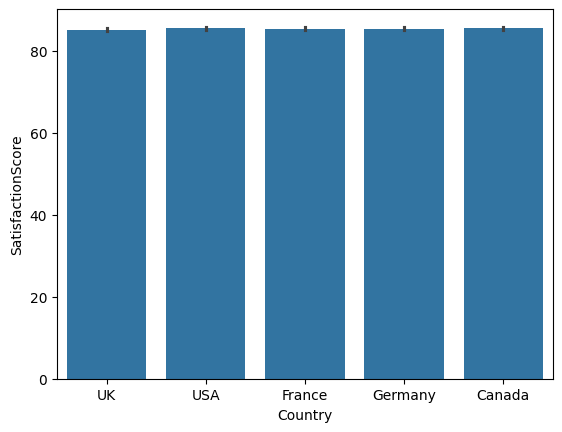

In [64]:
sns.barplot(x=df['Country'],y=df['SatisfactionScore'])
plt.show()

<h3 style="color:#AC8968;">Step 4-5: Check ProductQuality VS SatisfactionScore </h3>

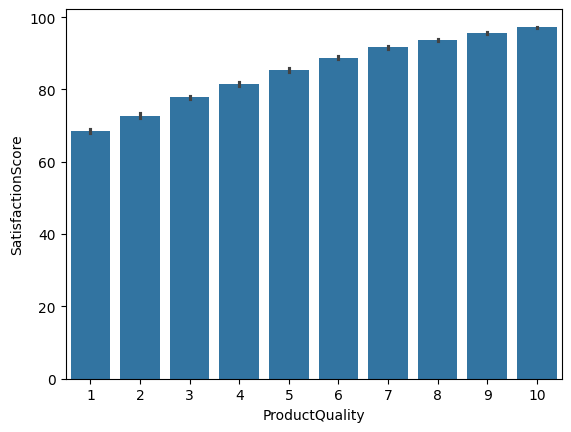

In [65]:
sns.barplot(x=df['ProductQuality'],y=df['SatisfactionScore'])
plt.show()

<h3 style="color:#AC8968;">Step 4-6: Check ServiceQuality VS SatisfactionScore </h3>

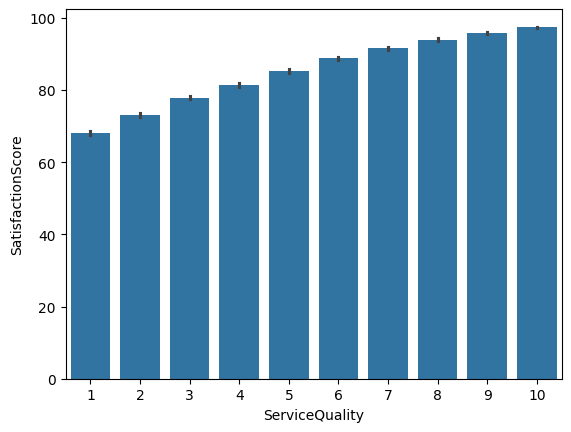

In [66]:
sns.barplot(x=df['ServiceQuality'],y=df['SatisfactionScore'])
plt.show()

<h3 style="color:#AC8968;">Step 4-7: Check FeedBackScore Count </h3>

In [67]:
df['FeedbackScore'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

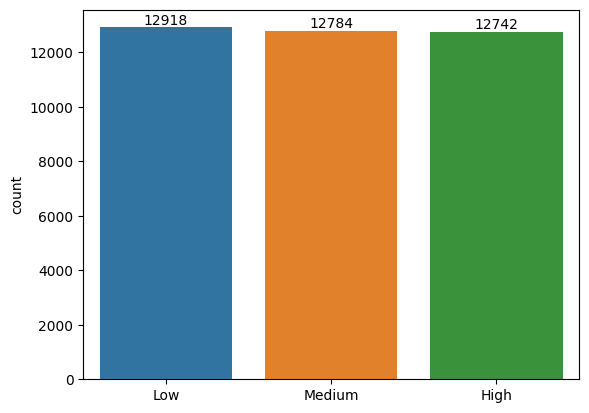

In [68]:
val = df['FeedbackScore'].value_counts()
sns.barplot(x = df['FeedbackScore'].unique() , y = val, hue=df['FeedbackScore'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

<h3 style="color:#AC8968;">Step 4-8: Check LoyaltyLevel Count </h3>

In [69]:
df['LoyaltyLevel'].unique()

array(['Bronze', 'Gold', 'Silver'], dtype=object)

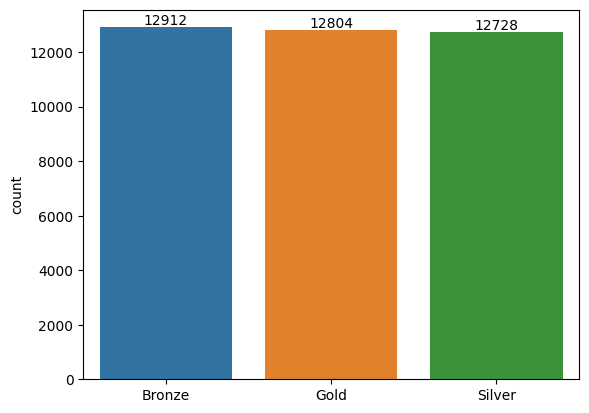

In [70]:
val = df['LoyaltyLevel'].value_counts()
sns.barplot(x = df['LoyaltyLevel'].unique() , y = val, hue=df['LoyaltyLevel'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

<h3 style="color:#AC8968;">Step 4-9: Correlation Matrix Of Numerical  </h3>

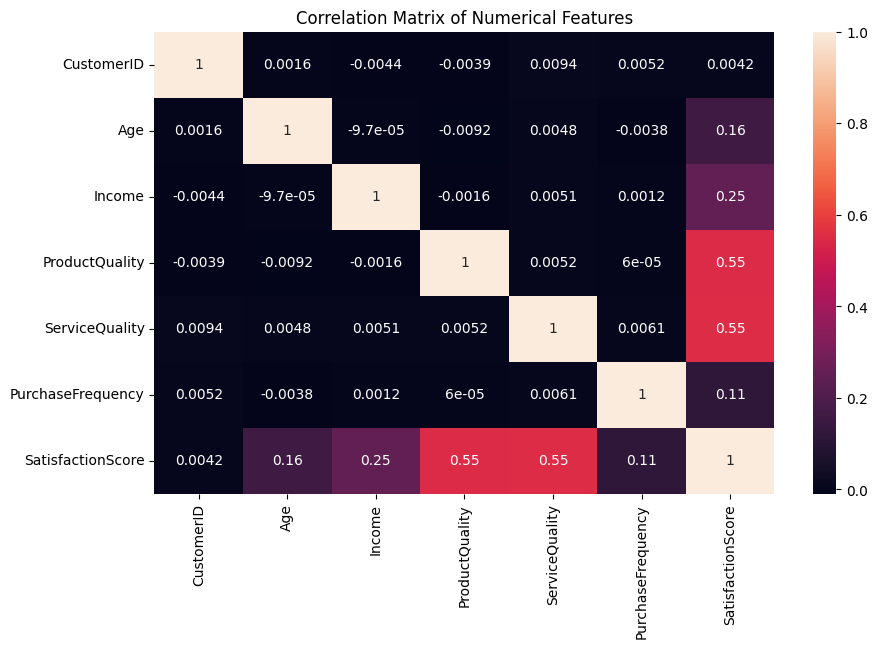

In [71]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numerical_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


<h3 style="color:#AC8968;">Step 5-1: Label Encoding the 'Object' column</h3>

In [73]:
object = df.select_dtypes(include=['object'])

le = LabelEncoder()
for col in object:
    df[col] = le.fit_transform(df[col])

In [74]:
df.head(2)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,3,83094,5,8,5,1,0,100.0
1,2,69,1,3,86860,10,2,8,2,1,100.0


<h3 style="color:#AC8968;">Step 5-2: Drop Inrelavent Columns</h3>


In [75]:
df.drop(columns=['CustomerID'], inplace=True)

<h3 style="color:#AC8968;">Step 5-3: Split the dataset into features (x) and target (y)</h3>

In [76]:
x = df.drop(columns=['SatisfactionScore'])
y = df['SatisfactionScore']

<h3 style="color:#AC8968;">Step 5-4: Split the dataset into training and testing sets</h3>

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h3 style="color:#AC8968;">Step 5-5: Check the processed data</h3>

In [78]:
print(x_train.shape), print(x_test.shape), print(y_train.shape), print(y_test.shape)

(30755, 9)
(7689, 9)
(30755,)
(7689,)


(None, None, None, None)

# <p style="background-color:#865D36; font-family:calibri; padding-top: 10px; padding-bottom: 10px; margin-right: 50px; margin-left: 50px; color:white; font-size:70%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building</p>

<h3 style="color:#AC8968;">Step 6-1: Linear Regression</h3>


In [79]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 7.38
mean_squared_error : 84.88
r2_score : 0.70


<h3 style="color:#AC8968;">Step 6-2: DecisionTree Regression</h3>


In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 7, 9, 11, 13],
    'min_samples_leaf': [5, 10, 15, 20],
    'min_samples_split': [10, 15, 20, 25]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')


mean_absolute_error : 5.83
mean_squared_error : 71.29
r2_score : 0.75


<h3 style="color:#AC8968;">Step 6-3: RandomForest Regression</h3>


In [87]:
model = RandomForestRegressor(n_estimators=150,max_depth= 12, min_samples_leaf= 10, min_samples_split= 8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.52
mean_squared_error : 62.16
r2_score : 0.78


<h3 style="color:#AC8968;">Step 6-4: GradientBoost Regression</h3>


In [89]:
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth= 6,min_samples_leaf=10,min_samples_split=8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.50
mean_squared_error : 59.84
r2_score : 0.79


<h3 style="color:#AC8968;">Step 6-4: All Model Report</h3>


In [98]:
def evaluate_model(model, x_test, y_test, model_name):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {
        'Model': model_name,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R2 Score': r2
    }

# List to store model evaluation results
results = []

# Evaluate each model and append results
results.append(evaluate_model(LinearRegression().fit(x_train, y_train), x_test, y_test, "Linear Regression"))
results.append(evaluate_model(DecisionTreeRegressor().fit(x_train, y_train), x_test, y_test, "Decision Tree Regressor"))
results.append(evaluate_model(RandomForestRegressor().fit(x_train, y_train), x_test, y_test, "Random Forest Regressor"))
results.append(evaluate_model(GradientBoostingRegressor().fit(x_train, y_train), x_test, y_test, "Gradient Boosting Regressor"))


results_df = pd.DataFrame(results)
print("\nModel Comparison:")
results_df



Model Comparison:


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,Linear Regression,7.382463,84.882974,0.697058
1,Random Forest Regressor,5.700307,65.750666,0.765340
2,Gradient Boosting Regressor,5.716866,60.179174,0.785224
3,Optimized Decision Tree Regressor,5.834342,71.287470,0.745579
